# Tutorial 1

In this session, we will look at the wikileaks dataset and learn how to start gathering statistics about the dataset, preprocess the emails and extract useful information.

https://en.wikipedia.org/wiki/2016_Democratic_National_Committee_email_leak
https://wikileaks.org/dnc-emails/

## DNC emails

Around 40 000 emails leaked from DNC, around 1000 distinct users.

I give you an already pre-processed dataset in .json, where the emails are a bit cleaned and put into a 'nice' structure. If you are interested in the process of crawling + generating this file, find me later or watch the repository: https://github.com/hanveiga/nlp-amld-2018


Before we start:

~~~
sudo python3.6 -m spacy download en
sudo python3.6 -m nltk.downloader all
cd data
curl https://www.dropbox.com/s/k16jptjyccxfdkn/clean_json.json?dl=0 -L -o clean_json.json
~~~

## Loading JSON file

In the folder you will find a json file.

In [26]:
import pandas as pd

path_data = 'data/clean_json.json'

def load_json_data(path_to_file):
    data_DF = pd.read_json(path_to_file,encoding='ascii')
    data_DF['from'] = data_DF['from'].str.lower()
    data_DF['body'] = data_DF['body'].apply(lambda x: " ".join(str(x).split()))
    return data_DF 

Loading dataset from data folder

In [27]:
data = load_json_data(path_data)

## Part 0:

Quick exploration of the dataset

How many users?   
Who sends the most emails?    
What are the most common words? 


1072
Count 	 Email
1780 	 mirandal@dnc.org
1518 	 hendricksl@dnc.org
1319 	 brinsterj@dnc.org
1110 	 walkere@dnc.org
1104 	 dncpress@dnc.org
1098 	 sargem@dnc.org
1077 	 freundlichc@dnc.org
1032 	 comers@dnc.org
892 	 garciaw@dnc.org
889 	 bhatnagara@dnc.org


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,1,'Emails per hour')

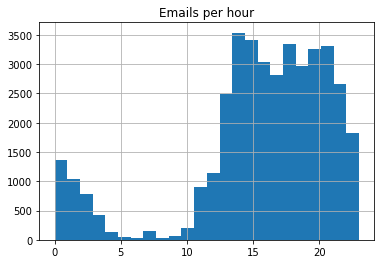

In [28]:
from collections import Counter
from matplotlib import pyplot as plt

user_emails = list(set(data['from']))
print(len(user_emails))

list_senders = []
printout = 0
print("Count \t Email")
for a in data.groupby(data["from"])["from"].count()\
                     .reset_index(name='count') \
                     .sort_values(['count'], ascending=False)\
                     .iterrows():
    _, email = a
    if printout < 10:
            print("%i \t %s" %(email['count'],email['from']))
            printout += 1
            list_senders.append([email['count'],email['from']])

vocabulary_body = data['body'].str.cat(sep=' ')
vocabulary_subjects = data['subject'].str.cat(sep=' ')

word_count_body = Counter([x for x in vocabulary_body.split(' ')])
word_count_subjects = Counter([x for x in vocabulary_subjects.split(' ')])

new = data[['date']]
new['hour'] = pd.DatetimeIndex(new['date']).hour
new['hour'].hist(bins=24)
plt.title('Emails per hour')

## Part 1:

Exploring one of the people in the dataset.

For example, some names were particularly centered in the controversy, such as:


Debbie Wasserman (email: hrtsleeve@gmail.com)    
Brad Marshal (email: marshall@dnc.or)     
Luis Miranda (mirandal@dnc.org) (he's just the top spammer :) )


In [29]:
email =  "hrtsleeve@gmail.com"
data[data["from"]==email][0:10]

,body,date,from,from_name,subject,to
10211,Good. Thanks everyone.,2016-05-06 15:29:08,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: Update,"[[""Miranda, Luis"", MirandaL@dnc.org]]"
10518,This is how he responds to Reid???,2016-05-17 19:11:55,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: FOR REVIEW: DNC Statement on Nevada Democr...,"[[""Miranda, Luis"", MirandaL@dnc.org], [, ""Banf..."
10560,"Please refer the reporter to Luis Miranda, the...",2016-05-17 21:38:24,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: Platform Committee Inquiry,"[[Greg Rosenbaum, greg@palisadesassociates.com]]"
10816,Damn liar. Particularly scummy that he barely ...,2016-05-17 14:38:09,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: Weaver on CNN re Nevada,"[[""Paustenbach, Mark"", PaustenbachM@dnc.org], ..."
11281,We need to discuss the point of disagreement a...,2016-05-22 14:04:41,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: Platform Rollout Plan,"[[Tracie Pough, PoughT@dnc.org]]"
11493,I am for the second one. What do others think?,2016-05-17 17:32:38,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: FOR REVIEW: DNC Statement on Nevada Democr...,"[[""Paustenbach, Mark"", PaustenbachM@dnc.org], ..."
11782,"No, I would not encourage them to do that. As ...",2016-05-12 02:25:18,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: Connecting you...,"[[Erik Smith, erik@blueenginemedia.com], [, Lu..."
11946,‎Good to go. No changes.,2016-05-17 23:34:49,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: FOR REVIEW: DWS statement about KY and OR ...,"[[""Miranda, Luis"", MirandaL@dnc.org]]"
12369,Excellent!,2016-04-29 23:50:56,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: The Hill - Sanders drops lawsuit against DNC,"[[""Miranda, Luis"", MirandaL@dnc.org], [, ""Dace..."
12652,I'm at a black tie dinner. Will quickly review...,2016-05-08 01:17:21,hrtsleeve@gmail.com,Debbie Wasserman Schultz,Re: Final Medium Post,"[[Leah Daughtry, ldaughtry@demconvention.com],..."


What words are the most emailed by this person?

In [30]:
from nltk.tokenize import word_tokenize
from collections import Counter

all_vocab = data[data["from"]==email]["body"].str.cat(sep=' ') + \
            data[data["from"]==email]["subject"].str.cat(sep=' ')
    

tokenized = word_tokenize(all_vocab.lower())

word_count = Counter(tokenized)
print(word_count.most_common(40))

[('.', 233), ('the', 215), (',', 189), ('to', 158), (':', 120), ('and', 101), ('a', 85), ('re', 81), ('that', 75), ('for', 73), ('is', 65), ('of', 61), ('?', 60), ('on', 58), ('in', 56), ("'s", 48), ('schultz', 48), ('wasserman', 47), ('it', 45), ('we', 41), ('i', 40), ('this', 39), ('dnc', 35), ('you', 35), ('’', 34), ('she', 34), ('he', 31), ('statement', 30), ('sanders', 29), ('at', 29), ('have', 27), ('be', 25), ('with', 25), ('as', 24), ('nevada', 24), ('democratic', 23), ('his', 22), ('was', 21), ('not', 20), ('been', 20)]


Ok this does not say much. How can we improve? Stop words?

In [31]:
import string
from nltk.corpus import stopwords

string_list = [a for a in string.punctuation]

In [32]:
all_stopwords = stopwords.words('english') + string_list + ['Re','FWD', "''", "``",'...',"-"]

tokenized2 = [a for a in tokenized if a not in all_stopwords ]
word_count2 = Counter(tokenized2)
print(word_count2.most_common(40))

[("'s", 48), ('schultz', 48), ('wasserman', 47), ('dnc', 35), ('’', 34), ('statement', 30), ('sanders', 29), ('nevada', 24), ('democratic', 23), ('debbie', 20), ('one', 19), ('tax', 18), ('review', 17), ('party', 17), ("n't", 16), ('trump', 16), ('said', 15), ('election', 15), ('chair', 14), ('“', 13), ('pm', 13), ('first', 12), ('returns', 12), ('interview', 12), ('bernie', 12), ('cnn', 12), ('—', 12), ('clinton', 12), ('letter', 12), ('dws', 11), ('alaska', 11), ('”', 11), ('need', 10), ('convention', 10), ('get', 10), ('approval', 10), ('going', 9), ('would', 9), ('right', 9), ('president', 9)]


Now let's try to get a feeling of what these people are talking about.

In this example, we will do a simple topic mining model and use spacy to pick up on relevant entities.

In particular:

    Aggregate the communication between two people
    Perform named entity extraction on the subset of emails

The output of this task is to find pairs of people and the keywords/topics they are talking about in their emails.

In [33]:
all_emails = data[data["from"]==email]

shared_vocab = ''
for index, row in all_emails.iterrows():
    try:
        if "MirandaL@dnc.org" in row['to'][0]:
            shared_vocab += row["body"]
            shared_vocab += ' '
    except:
        pass
    
tokenized = word_tokenize(shared_vocab.lower())
tokenized2 = [a for a in tokenized if a not in all_stopwords ]
word_count = Counter(tokenized2)
print(word_count.most_common(40))

[("'s", 39), ('wasserman', 36), ('schultz', 36), ('sanders', 23), ('said', 12), ('bernie', 12), ('—', 12), ("n't", 12), ('debbie', 10), ('clinton', 10), ('’', 8), ('democratic', 8), ('fire', 8), ('violence', 8), ('jones', 8), ('primary', 8), ('dnc', 7), ('already', 6), ('people', 6), ('says', 6), ('fuel', 6), ('weekend', 6), ('nevada', 6), ('part', 6), ('hillary', 6), ('one', 6), ('arrested', 6), ('pierce', 6), ("'re", 6), ('fair', 6), ('made', 6), ('top', 6), ('media', 6), ('get', 5), ('things', 5), ('going', 5), ('let', 4), ('problem', 4), ('narrative', 4), ('could', 4)]


In [34]:
import spacy
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nlp = spacy.load('en')
relevant_entities = ['EVENT','FAC','GPE','LAW','NORP','ORG','PRODUCT', 'PERSON']

def get_keywords(sentence, ntop = 5):
    if len(sentence) > 100000:
        #going to truncate the sentence
        sentence = sentence[0:100000]
        
    keywords = defaultdict(Counter)
    doc = nlp(sentence)
    for ent in doc.ents:
        if ent.label_ in relevant_entities:
            keywords[ent.label_][ent.text]+=1
            
    most_common_keywords = defaultdict(list)
    
    for key in keywords.keys():
        most_common_keywords[key] = keywords[key].most_common(ntop)
               
    return most_common_keywords

get_keywords(shared_vocab)


defaultdict(list,
            {'PERSON': [('Debbie Wasserman Schultz', 8),
              ('Wasserman Schultz', 8),
              ("Wasserman Schultz's", 8),
              ('Bernie Sanders', 6),
              ('Jones', 6)],
             'ORG': [('Sanders', 15),
              ('DNC', 6),
              ('Bernie', 4),
              ('MSNBC', 4),
              ('WASHINGTON POSTLiberal', 2)],
             'GPE': [('Nevada', 6),
              ('Israel', 2),
              ('Atlanta', 2),
              ('Politico', 2)],
             'NORP': [('Democratic', 6),
              ('Wasserman Schultz', 4),
              ('Republican', 2),
              ('Republicans', 2),
              ('Democrats', 2)]})

## Last task

Who has the most similar vocabulary?

We use scikit learn for this!

In [18]:
# Remember before we generated the word counts and user emails?
# user_emails, word_count_body
vocabulary_body_set = word_count_body.keys()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(vocabulary=vocabulary_body_set,max_features=2000,stop_words='english')

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

emails = []
user_emails = [a for a in user_emails if len(a)>3]
user_emails = list(set(user_emails))
nemails = 40
for email in user_emails[0:nemails]:
    e = data[data["from"]==email]["body"].str.cat(sep=' ')
    emails.append(e)
    
X = vectorizer.fit_transform(emails)
max_sim = 0
for i in range(nemails):
    for j in range(nemails):
        if cosine_similarity(X[i,:],X[j,:]) > max_sim and i != j:
            max_sim = cosine_similarity(X[i,:],X[j,:])
            pair = [i,j]
            

In [25]:
print(user_emails[pair[0]],user_emails[pair[1]])
print(get_keywords(emails[pair[0]],ntop=3))
print(get_keywords(emails[pair[1]],ntop=3))

dillonl@dnc.org bhatnagara@dnc.org
defaultdict(<class 'list'>, {'PERSON': [('Walker', 37), ('Mark', 32), ('Donald Trump', 31)], 'GPE': [('Paustenbach', 34), ('Alaska', 32), ('the United States', 18)], 'ORG': [('DNC', 31), ('Trump', 29), ('RR2', 18)], 'FAC': [('the White House', 3), ('Intro Good', 2), ('Day One', 2)], 'NORP': [('Republicans', 20), ('Republican', 20), ('Muslim', 20)], 'LAW': [('the Affordable Care Act', 3), ('the Kenai Fjords National Park', 2), ('Constitution', 2)], 'EVENT': [('Inauguration Day', 2), ('Get-Out-The-Vote', 2), ('the Iraq war', 1)], 'PRODUCT': [('Veepstakes', 1)]})
defaultdict(<class 'list'>, {'PERSON': [('Trump', 52), ('Cruz', 50), ('Video Request', 31)], 'ORG': [('Subject', 68), ('CNN', 27), ('GOP', 19)], 'PRODUCT': [('Agenda', 2), ('Happened', 1), ('Stars', 1)], 'GPE': [('Bhatnagar', 31), ('Indiana', 25), ('Akshai', 16)], 'NORP': [('Trump', 15), ('American', 11), ('Republican', 9)], 'FAC': [('Rachel Palermo Democratic', 1), ('Miranda', 1), ('VP', 1)], '